这里分别利用PopIII,q3-delay,q3-nodelay三种天文学模型，计算平均而言数据间隙对参数估计的影响

In [1]:
import pandas as pd
import numpy as np
import waveform as wf
import fishermatrix as fm
import dataprocess as dp
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['font.family'] = 'Times new roman'  # 设置字体为 Arial
#plt.rcParams['font.size'] = 15

pi = np.pi

In [2]:
data = pd.read_fwf('population_data/Klein16_Q3delays.txt', header=None)

In [3]:
print(data)

            0             1             2       3       4         5   \
0      5.14120  2.941100e+03  1.251600e+03  0.9980  0.3041  0.166150   
1      1.30420  5.216500e+05  2.354600e+05  0.3028  0.6928  0.093150   
2      0.84722  1.710300e+05  3.495100e+04  0.7298  0.8416  0.102440   
3      0.42522  3.099700e+05  2.655800e+05  0.9980  0.9977  0.078513   
4      1.56180  9.210800e+05  3.962500e+05  0.9978  0.9980  0.268010   
...        ...           ...           ...     ...     ...       ...   
36817  0.59970  6.177000e+08  1.510700e+08  0.4121  0.3065  0.661270   
36818  0.54640  3.553500e+09  1.478700e+09  0.7985  0.3818  0.218640   
36819  0.33192  2.596900e+09  9.138600e+08  0.2866  0.5163  0.789100   
36820  0.30599  4.753500e+09  1.973400e+09  0.8593  0.4325  0.837960   
36821  0.23658  6.091200e+08  2.750400e+07  0.1766  0.3206  1.135900   

             6         7        8        9   ...        13            14  \
0      0.071761  0.165200  1.36740  0.94362  ...    38.496 

In [3]:
len_pop = len(data.iloc[:,1])-1     #这一行给出popIII模型的catalog长度
rand_int = np.random.randint(len_pop)       #这一行生成catalog长度的随机整数
#red1,m11,m12 = data.iloc[rand_int,0],data.iloc[rand_int,1],data.iloc[rand_int,2]        #赋值红移，质量1，质量2，两个主要参数

#Mass1 =(m11+m12)*0.94

#ratio1 = m11/m12

#param1 = [Mass1,ratio1,red1]


In [4]:
np.random.seed(234)
SNR_threshold = 8     #SNR threshold
event_rate_p3 = 300
Index_p3 = []
len_pop = len(data.iloc[:,1])-1     #这一行给出popIII模型的catalog长度
error_w1_n = []
error_w2_n = []
error_w3_n = []
error_w4_n = []

error_t1_n = []
error_t2_n = []
error_t3_n = []
error_t4_n = []


#给有gap情况的
error_w1_ngp = []
error_w2_ngp = []
error_w3_ngp = []
error_w4_ngp = []

error_t1_ngp = []
error_t2_ngp = []
error_t3_ngp = []
error_t4_ngp = []
freq = np.arange(1e-5,1,1e-5)
print(event_rate_p3)
num = 0
for nn in tqdm(range(event_rate_p3)):

    rand_int = np.random.randint(len_pop)       #这一行生成catalog长度的随机整数
    red1,m11,m12 = data.iloc[rand_int,0],data.iloc[rand_int,1],data.iloc[rand_int,2]        #赋值红移，质量1，质量2，两个主要参数

    Mass1 = (m11+m12)*0.94
    if 1e5  <Mass1<1e8:
        ratio1 = m11/m12
        rd_ang = np.random.uniform(0,pi,3)
        random = np.random.uniform(0,1)
        param1 = [Mass1,ratio1,red1]
        fi = wf.fin(Mass1,ratio1)
        fe = wf.fout(Mass1,ratio1)
        freq_rd = np.arange(fi,fe,1e-5)
        #signal = wf.gap_sfa(freq,param1,rd_ang,random,'tj')
        signal1 = wf.sfa(freq_rd,param1,rd_ang,'tj')
        snr_index = dp.SNR(signal1,signal1,wf.PSD_tj(freq_rd),1e-5)
        if snr_index>SNR_threshold:
            num+=1
            result = fm.tj_fm(param1,rd_ang)
            error_w1_n.append(result[0])
            error_w2_n.append(result[1])
            error_w3_n.append(result[2])
            error_w4_n.append(result[3])
            error_t1_n.append(result[4])
            error_t2_n.append(result[5])
            error_t3_n.append(result[6])
            error_t4_n.append(result[7])

            result2 = fm.gp_tj_fm(freq,param1,rd_ang,random)
            error_w1_ngp.append(result2[0])
            error_w2_ngp.append(result2[1])
            error_w3_ngp.append(result2[2])
            error_w4_ngp.append(result2[3])
            error_t1_ngp.append(result2[4])
            error_t2_ngp.append(result2[5])
            error_t3_ngp.append(result2[6])
            error_t4_ngp.append(result2[7])
error_w1 = np.array(error_w1_n)
error_w2 = np.array(error_w2_n)
error_w3 = np.array(error_w3_n)
error_w4 = np.array(error_w4_n)
error_t1 = np.array(error_t1_n)
error_t2 = np.array(error_t2_n)
error_t3 = np.array(error_t3_n)
error_t4 = np.array(error_t4_n)

error_w1_gp = np.array(error_w1_ngp)
error_w2_gp = np.array(error_w2_ngp)
error_w3_gp = np.array(error_w3_ngp)
error_w4_gp = np.array(error_w4_ngp)
error_t1_gp = np.array(error_t1_ngp)
error_t2_gp = np.array(error_t2_ngp)
error_t3_gp = np.array(error_t3_ngp)
error_t4_gp = np.array(error_t4_ngp)


10


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:43<00:00,  4.38s/it]


In [43]:
np.random.seed(234)
SNR_threshold = 8     #SNR threshold
event_rate_p3 = 300
Index_p3 = []
len_pop = len(data.iloc[:,1])-1     #这一行给出popIII模型的catalog长度
error_w1_n = []
error_w2_n = []
error_w3_n = []
error_w4_n = []

error_t1_n = []
error_t2_n = []
error_t3_n = []
error_t4_n = []


#给有gap情况的
error_w1_ngp = []
error_w2_ngp = []
error_w3_ngp = []
error_w4_ngp = []

error_t1_ngp = []
error_t2_ngp = []
error_t3_ngp = []
error_t4_ngp = []
freq = np.arange(1e-5,1,1e-5)
print(event_rate_p3)
num = 0
np.random.seed(234617)
random_detector2 = np.random.uniform(0,1,222)
for nn in tqdm(range(event_rate_p3)):

    rand_int = np.random.randint(len_pop)       #这一行生成catalog长度的随机整数
    red1,m11,m12 = data.iloc[rand_int,0],data.iloc[rand_int,1],data.iloc[rand_int,2]        #赋值红移，质量1，质量2，两个主要参数

    Mass1 = (m11+m12)*0.94
    if 1e5  <Mass1<1e8:
        ratio1 = m11/m12
        rd_ang = np.random.uniform(0,pi,3)
        random1 = np.random.uniform(0,1)
        random2 = random_detector2[num]
        param1 = [Mass1,ratio1,red1]
        fi = wf.fin(Mass1,ratio1)
        fe = wf.fout(Mass1,ratio1)
        freq_rd = np.arange(fi,fe,1e-5)
        #signal = wf.gap_sfa(freq,param1,rd_ang,random,'tj')
        signal1 = wf.sfa(freq_rd,param1,rd_ang,'tj')
        snr_index = dp.SNR(signal1,signal1,wf.PSD_tj(freq_rd),1e-5)
        if snr_index>SNR_threshold:
            num+=1
            result = fm.comb_fm(param1,rd_ang,'tj','tq')
            error_w1_n.append(result[0])
            error_w2_n.append(result[1])
            error_w3_n.append(result[2])
            error_w4_n.append(result[3])
            error_t1_n.append(result[4])
            error_t2_n.append(result[5])
            error_t3_n.append(result[6])
            error_t4_n.append(result[7])

            result2 = fm.gp_comb_fm(freq,param1,rd_ang,random1,random2,'tj','tq')
            error_w1_ngp.append(result2[0])
            error_w2_ngp.append(result2[1])
            error_w3_ngp.append(result2[2])
            error_w4_ngp.append(result2[3])
            error_t1_ngp.append(result2[4])
            error_t2_ngp.append(result2[5])
            error_t3_ngp.append(result2[6])
            error_t4_ngp.append(result2[7])
error_w1_cb = np.array(error_w1_n)
error_w2_cb = np.array(error_w2_n)
error_w3_cb = np.array(error_w3_n)
error_w4_cb = np.array(error_w4_n)
error_t1_cb = np.array(error_t1_n)
error_t2_cb = np.array(error_t2_n)
error_t3_cb = np.array(error_t3_n)
error_t4_cb = np.array(error_t4_n)

error_w1_gp_cb = np.array(error_w1_ngp)
error_w2_gp_cb = np.array(error_w2_ngp)
error_w3_gp_cb = np.array(error_w3_ngp)
error_w4_gp_cb = np.array(error_w4_ngp)
error_t1_gp_cb = np.array(error_t1_ngp)
error_t2_gp_cb = np.array(error_t2_ngp)
error_t3_gp_cb = np.array(error_t3_ngp)
error_t4_gp_cb = np.array(error_t4_ngp)

300


100%|██████████| 300/300 [58:10<00:00, 11.64s/it] 


In [141]:
np.random.seed(234)
SNR_threshold = 8     #SNR threshold
event_rate_p3 = 300
Index_p3 = []
len_pop = len(data.iloc[:,1])-1     #这一行给出popIII模型的catalog长度
error_w1_n = []
error_w2_n = []
error_w3_n = []
error_w4_n = []

error_t1_n = []
error_t2_n = []
error_t3_n = []
error_t4_n = []


#给有gap情况的
error_w1_ngp = []
error_w2_ngp = []
error_w3_ngp = []
error_w4_ngp = []

error_t1_ngp = []
error_t2_ngp = []
error_t3_ngp = []
error_t4_ngp = []
freq = np.arange(1e-5,1,1e-5)
print(event_rate_p3)
num = 0
for nn in tqdm(range(event_rate_p3)):

    rand_int = np.random.randint(len_pop)       #这一行生成catalog长度的随机整数
    red1,m11,m12 = data.iloc[rand_int,0],data.iloc[rand_int,1],data.iloc[rand_int,2]        #赋值红移，质量1，质量2，两个主要参数

    Mass1 = (m11+m12)*0.94
    if 1e5  <Mass1<1e8:
        ratio1 = m11/m12
        rd_ang = np.random.uniform(0,pi,3)
        random = np.random.uniform(0,1)
        param1 = [Mass1,ratio1,red1]
        fi = wf.fin(Mass1,ratio1)
        fe = wf.fout(Mass1,ratio1)
        freq_rd = np.arange(fi,fe,1e-5)
        #signal = wf.gap_sfa(freq,param1,rd_ang,random,'tj')
        signal1 = wf.sfa(freq_rd,param1,rd_ang)
        snr_index = dp.SNR(signal1,signal1,wf.PSD_ls(freq_rd),1e-5)
        if snr_index>SNR_threshold:
            num+=1
            result = fm.ls_fm(param1,rd_ang)
            error_w1_n.append(result[0])
            error_w2_n.append(result[1])
            error_w3_n.append(result[2])
            error_w4_n.append(result[3])
            error_t1_n.append(result[4])
            error_t2_n.append(result[5])
            error_t3_n.append(result[6])
            error_t4_n.append(result[7])

            result2 = fm.gp_ls_fm(freq,param1,rd_ang,random)
            error_w1_ngp.append(result2[0])
            error_w2_ngp.append(result2[1])
            error_w3_ngp.append(result2[2])
            error_w4_ngp.append(result2[3])
            error_t1_ngp.append(result2[4])
            error_t2_ngp.append(result2[5])
            error_t3_ngp.append(result2[6])
            error_t4_ngp.append(result2[7])
error_w1_ls = np.array(error_w1_n)
error_w2_ls = np.array(error_w2_n)
error_w3_ls = np.array(error_w3_n)
error_w4_ls = np.array(error_w4_n)
error_t1_ls = np.array(error_t1_n)
error_t2_ls = np.array(error_t2_n)
error_t3_ls = np.array(error_t3_n)
error_t4_ls = np.array(error_t4_n)

error_w1_gp_ls = np.array(error_w1_ngp)
error_w2_gp_ls = np.array(error_w2_ngp)
error_w3_gp_ls = np.array(error_w3_ngp)
error_w4_gp_ls = np.array(error_w4_ngp)
error_t1_gp_ls = np.array(error_t1_ngp)
error_t2_gp_ls = np.array(error_t2_ngp)
error_t3_gp_ls = np.array(error_t3_ngp)
error_t4_gp_ls = np.array(error_t4_ngp)

300


100%|██████████| 300/300 [38:52<00:00,  7.77s/it]


In [78]:
len(error_w1_gp)
deltaqnm_tjtq_optimal = [error_w1,error_w2,error_w3,error_w4,error_t1,error_t2,error_t3,error_t4]
gap_deltaqnm_tjtq_optimal = [error_w1_gp,error_w2_gp,error_w3_gp,error_w4_gp,error_t1_gp,error_t2_gp,error_t3_gp,error_t4_gp]

np.savetxt('delta_population/op_deltaqnm_tj.txt',deltaqnm_tjtq_optimal,delimiter=',')
np.savetxt('delta_population/gap_deltaqnm_tj.txt',gap_deltaqnm_tjtq_optimal,delimiter=',')

In [303]:
num = 0
event_rate_p3 = 600
np.random.seed(234)
for nn in range(event_rate_p3):

    rand_int = np.random.randint(len_pop)       #这一行生成catalog长度的随机整数
    red1,m11,m12 = data3.iloc[rand_int,0],data3.iloc[rand_int,1],data3.iloc[rand_int,2]        #赋值红移，质量1，质量2，两个主要参数

    Mass1 = (m11+m12)*0.94
    thetad = 1.17662
    psid = -0.873302
    phid = -0.615727
    rd_ang = [thetad,psid,phid]
    if 1e5  <Mass1<1e9:
        ratio1 = m11/m12
        rd_ang = np.random.uniform(0,pi,3)
        #print(rd_ang)
        rd_ang = [thetad,psid,phid]
        random = np.random.uniform(0,1)
        param1 = [Mass1,ratio1,red1]
        fi = wf.fin(Mass1,ratio1)
        fe = wf.fout(Mass1,ratio1)
        freq_rd = np.arange(fi,fe,1e-5)
        #signal = wf.gap_sfa(freq,param1,rd_ang,random,'tj')
        signal1 = wf.sfa(freq_rd,param1,rd_ang,'tj')
        snr_index = dp.SNR(signal1,signal1,wf.PSD_tj(freq_rd),1e-5)
        if snr_index>8:
            num+=1
print(num)

256


In [42]:
error_w1 = np.array(error_w1_n)
error_w2 = np.array(error_w2_n)
error_w3 = np.array(error_w3_n)
error_w4 = np.array(error_w4_n)
error_t1 = np.array(error_t1_n)
error_t2 = np.array(error_t2_n)
error_t3 = np.array(error_t3_n)
error_t4 = np.array(error_t4_n)

error_w1_gp = np.array(error_w1_gp)
error_w2_gp = np.array(error_w2_gp)
error_w3_gp = np.array(error_w3_gp)
error_w4_gp = np.array(error_w4_gp)
error_t1_gp = np.array(error_t1_gp)
error_t2_gp = np.array(error_t2_gp)
error_t3_gp = np.array(error_t3_gp)
error_t4_gp = np.array(error_t4_gp)

In [237]:

r_tj_gp = np.array([error_w1_gp,error_w2_gp,error_w3_gp,error_w4_gp,error_t1_gp,error_t2_gp,error_t3_gp,error_t4_gp])
r_tj = np.array([error_w1,error_w2,error_w3,error_w4,error_t1,error_t2,error_t3,error_t4])
r_cb_gp = np.array([error_w1_gp_cb,error_w2_gp_cb,error_w3_gp_cb,error_w4_gp_cb,error_t1_gp_cb,error_t2_gp_cb,error_t3_gp_cb,error_t4_gp_cb])
r_cb = np.array([error_w1_cb,error_w2_cb,error_w3_cb,error_w4_cb,error_t1_cb,error_t2_cb,error_t3_cb,error_t4_cb])
r_ls_gp = np.array([error_w1_gp_ls,error_w2_gp_ls,error_w3_gp_ls,error_w4_gp_ls,error_t1_gp_ls,error_t2_gp_ls,error_t3_gp_ls,error_t4_gp_ls])
r_ls = np.array([error_w1_ls,error_w2_ls,error_w3_ls,error_w4_ls,error_t1_ls,error_t2_ls,error_t3_ls,error_t4_ls])

r_ls = np.loadtxt('delta_population/r_ls.txt', delimiter=',')
r_ls_gp = np.loadtxt('delta_population/r_ls_gp.txt', delimiter=',')
r_tj_gp = np.loadtxt('delta_population/gap_deltaqnm_tj.txt', delimiter=',')
r_tj = np.loadtxt('delta_population/op_deltaqnm_tj.txt', delimiter=',')
r_cb_gp = np.loadtxt('delta_population/gap_deltaqnm_tjtq_optimal.txt', delimiter=',')
r_cb = np.loadtxt('delta_population/deltaqnm_tjtq_optimal.txt', delimiter=',')
d1 = np.abs((r_tj_gp-r_tj)/r_tj)
d3 = np.abs((r_cb_gp-r_cb)/r_cb)
d2 = np.abs((r_ls_gp-r_ls)/r_ls)

np.savetxt('delta_population/r_ls.txt',r_ls,delimiter=',')
np.savetxt('delta_population/r_ls_gp.txt',r_ls_gp,delimiter=',')

#print(np.abs((error_w1_gp_cb - error_w1_cb)/error_w1_cb))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


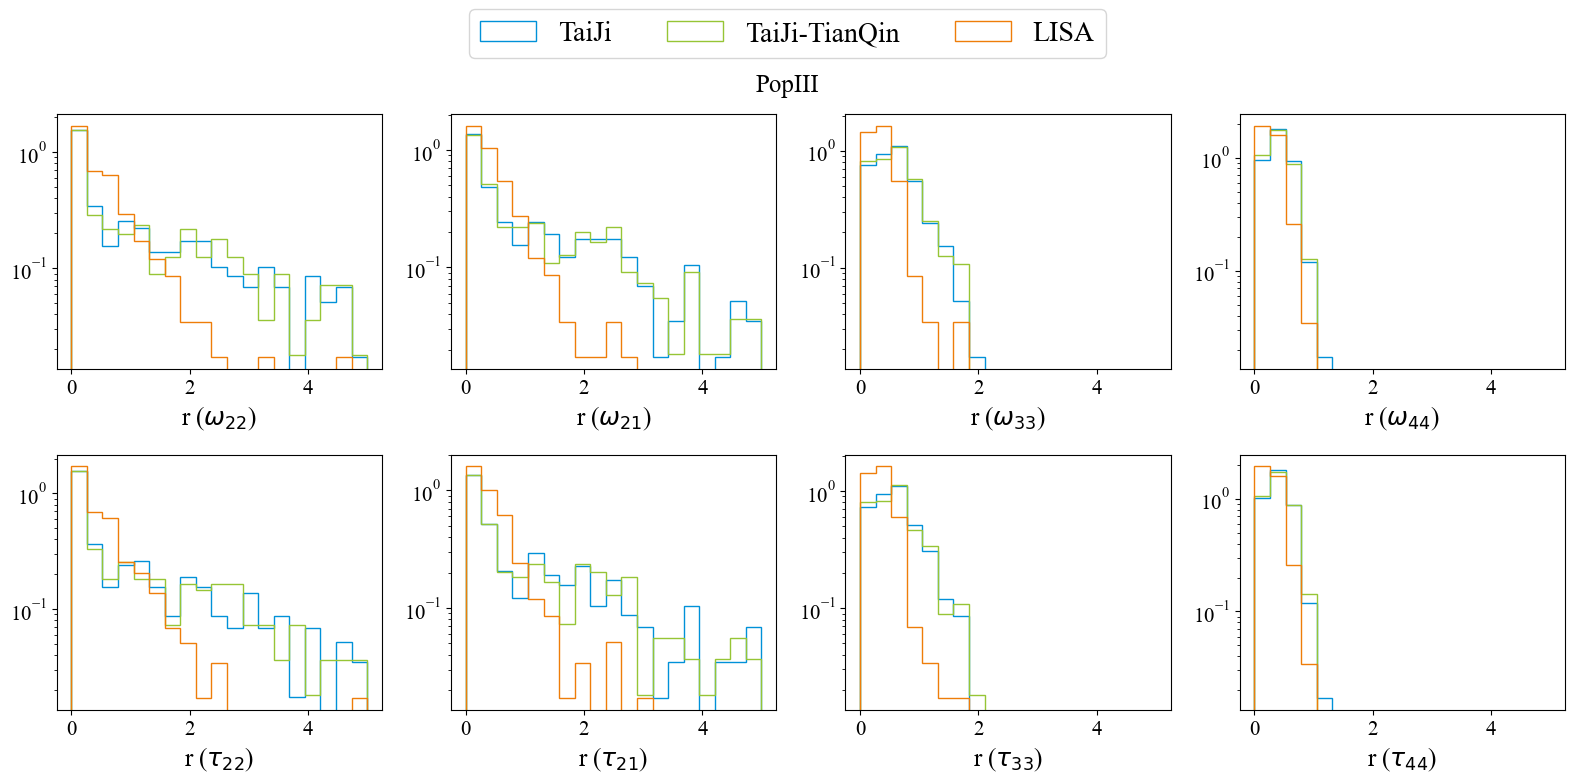

In [235]:
# 设置相同的x轴范围和bins
bins = np.linspace(0, 5, 20)
#xlim = (1, 1000)

# 创建图形和子图
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# 在每个子图上绘制多个直方图
numij = 0
for i in range(2):
    for j in range(4):
        
        axs[i, j].hist(d1[numij], bins=bins, histtype='step', color='#0091D8', density=True)
        axs[i, j].hist(d3[numij], bins=bins, histtype='step', color='#96C535', density=True)
        axs[i, j].hist(d2[numij], bins=bins, histtype='step', color='#EE7D09', density=True)
        
        #axs[i, j].hist(data3, bins=bins, histtype='step', color='green', density=True)
        #axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')
        numij +=1
        #axs[i, j].set_xlim(xlim)

# 添加各个子图的标签
labels = [r'r ($\omega_{22}$)', r'r ($\omega_{21}$)', r'r ($\omega_{33}$)', r'r ($\omega_{44}$)',  
          r'r ($\tau_{22}$)', r'r ($\tau_{21}$)', r'r ($\tau_{33}$)', r'r ($\tau_{44}$)']

for ax, label in zip(axs.flat, labels):
    ax.set_xlabel(label,fontsize=18)
    

# 在第一行子图上方添加标题
fig.text(0.5, 0.88, 'PopIII', ha='center', fontsize=18)  # 调整标题的位置

# 添加图例
fig.legend(['TaiJi','TaiJi-TianQin', 'LISA'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.0), fontsize=20)

# 调整布局
plt.subplots_adjust(top=0.88, bottom=0.1)  # 调整 top 参数以预留足够空间
plt.tight_layout(rect=[0, 0, 1, 0.88])

# 显示图形
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/PopIII Taiji-Tianqin.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/PopIII Taiji-Tianqin.png")
plt.show()


In [188]:
data2 = pd.read_fwf('population_data/Klein16_PopIII.txt', header=None)

In [194]:
np.random.seed(234)
SNR_threshold = 8     #SNR threshold
event_rate_p3 = 8000
Index_p3 = []
len_pop = len(data2.iloc[:,1])-1     #这一行给出popIII模型的catalog长度
error_w1_n = []
error_w2_n = []
error_w3_n = []
error_w4_n = []
error_t1_n = []
error_t2_n = []
error_t3_n = []
error_t4_n = []


#给有gap情况的
error_w1_ngp = []
error_w2_ngp = []
error_w3_ngp = []
error_w4_ngp = []
error_t1_ngp = []
error_t2_ngp = []
error_t3_ngp = []
error_t4_ngp = []

error_w1_n_tj = []
error_w2_n_tj = []
error_w3_n_tj = []
error_w4_n_tj = []
error_t1_n_tj = []
error_t2_n_tj = []
error_t3_n_tj = []
error_t4_n_tj = []

error_w1_ngp_tj = []
error_w2_ngp_tj = []
error_w3_ngp_tj = []
error_w4_ngp_tj = []
error_t1_ngp_tj = []
error_t2_ngp_tj = []
error_t3_ngp_tj = []
error_t4_ngp_tj = []

error_w1_n_ls = []
error_w2_n_ls = []
error_w3_n_ls = []
error_w4_n_ls = []
error_t1_n_ls = []
error_t2_n_ls = []
error_t3_n_ls = []
error_t4_n_ls = []

error_w1_n_gpls = []
error_w2_n_gpls = []
error_w3_n_gpls = []
error_w4_n_gpls = []
error_t1_n_gpls = []
error_t2_n_gpls = []
error_t3_n_gpls = []
error_t4_n_gpls = []


freq = np.arange(1e-5,1,1e-5)
num = 0

for nn in tqdm(range(event_rate_p3)):

    rand_int = np.random.randint(len_pop)       #这一行生成catalog长度的随机整数
    red1,m11,m12 = data2.iloc[rand_int,0],data2.iloc[rand_int,1],data2.iloc[rand_int,2]        #赋值红移，质量1，质量2，两个主要参数

    Mass1 = (m11+m12)*0.94
    if 1e5  <Mass1<1e8:
        ratio1 = m11/m12
        rd_ang = np.random.uniform(0,pi,3)
        random1,random2 = np.random.uniform(0,1,2)
        
        param1 = [Mass1,ratio1,red1]
        fi = wf.fin(Mass1,ratio1)
        fe = wf.fout(Mass1,ratio1)
        freq_rd = np.arange(fi,fe,1e-5)
        #signal = wf.gap_sfa(freq,param1,rd_ang,random,'tj')
        signal1 = wf.sfa(freq_rd,param1,rd_ang,'tj')
        snr_index = dp.SNR(signal1,signal1,wf.PSD_tj(freq_rd),1e-5)
        if snr_index>SNR_threshold:
            num+=1


            #先算联合观测的，第一个是太极天琴联合观测，第二个是有间隙太极天琴联合观测，第三个是单独太极间隙
            result = fm.comb_fm(param1,rd_ang,'tj','tq')
            error_w1_n.append(result[0])
            error_w2_n.append(result[1])
            error_w3_n.append(result[2])
            error_w4_n.append(result[3])
            error_t1_n.append(result[4])
            error_t2_n.append(result[5])
            error_t3_n.append(result[6])
            error_t4_n.append(result[7])

            result2 = fm.gp_comb_fm(freq,param1,rd_ang,random1,random2,'tj','tq')
            error_w1_ngp.append(result2[0])
            error_w2_ngp.append(result2[1])
            error_w3_ngp.append(result2[2])
            error_w4_ngp.append(result2[3])
            error_t1_ngp.append(result2[4])
            error_t2_ngp.append(result2[5])
            error_t3_ngp.append(result2[6])
            error_t4_ngp.append(result2[7])
            
            error_w1_ngp_tj.append(result2[8][0])
            error_w2_ngp_tj.append(result2[8][1])
            error_w3_ngp_tj.append(result2[8][2])
            error_w4_ngp_tj.append(result2[8][3])
            error_t1_ngp_tj.append(result2[8][4])
            error_t2_ngp_tj.append(result2[8][5])
            error_t3_ngp_tj.append(result2[8][6])
            error_t4_ngp_tj.append(result2[8][7])

            result3 = fm.tj_fm(param1,rd_ang)
            error_w1_n_tj.append(result3[0])
            error_w2_n_tj.append(result3[1])
            error_w3_n_tj.append(result3[2])
            error_w4_n_tj.append(result3[3])
            error_t1_n_tj.append(result3[4])
            error_t2_n_tj.append(result3[5])
            error_t3_n_tj.append(result3[6])
            error_t4_n_tj.append(result3[7])

            result4 = fm.ls_fm(param1,rd_ang)
            error_w1_n_ls.append(result4[0])
            error_w2_n_ls.append(result4[1])
            error_w3_n_ls.append(result4[2])
            error_w4_n_ls.append(result4[3])
            error_t1_n_ls.append(result4[4])
            error_t2_n_ls.append(result4[5])
            error_t3_n_ls.append(result4[6])
            error_t4_n_ls.append(result4[7])

            result4 = fm.gp_ls_fm(freq,param1,rd_ang,random1)
            error_w1_n_gpls.append(result4[0])
            error_w2_n_gpls.append(result4[1])
            error_w3_n_gpls.append(result4[2])
            error_w4_n_gpls.append(result4[3])
            error_t1_n_gpls.append(result4[4])
            error_t2_n_gpls.append(result4[5])
            error_t3_n_gpls.append(result4[6])
            error_t4_n_gpls.append(result4[7])

error_w1_cb = np.array(error_w1_n)
error_w2_cb = np.array(error_w2_n)
error_w3_cb = np.array(error_w3_n)
error_w4_cb = np.array(error_w4_n)
error_t1_cb = np.array(error_t1_n)
error_t2_cb = np.array(error_t2_n)
error_t3_cb = np.array(error_t3_n)
error_t4_cb = np.array(error_t4_n)

error_w1_gp_cb = np.array(error_w1_ngp)
error_w2_gp_cb = np.array(error_w2_ngp)
error_w3_gp_cb = np.array(error_w3_ngp)
error_w4_gp_cb = np.array(error_w4_ngp)
error_t1_gp_cb = np.array(error_t1_ngp)
error_t2_gp_cb = np.array(error_t2_ngp)
error_t3_gp_cb = np.array(error_t3_ngp)
error_t4_gp_cb = np.array(error_t4_ngp)

error_w1_gp_tj = np.array(error_w1_ngp_tj)
error_w2_gp_tj = np.array(error_w2_ngp_tj)
error_w3_gp_tj = np.array(error_w3_ngp_tj)
error_w4_gp_tj = np.array(error_w4_ngp_tj)
error_t1_gp_tj = np.array(error_t1_ngp_tj)
error_t2_gp_tj = np.array(error_t2_ngp_tj)
error_t3_gp_tj = np.array(error_t3_ngp_tj)
error_t4_gp_tj = np.array(error_t4_ngp_tj)

error_w1_tj = np.array(error_w1_n_tj)
error_w2_tj = np.array(error_w2_n_tj)
error_w3_tj = np.array(error_w3_n_tj)
error_w4_tj = np.array(error_w4_n_tj)
error_t1_tj = np.array(error_t1_n_tj)
error_t2_tj = np.array(error_t2_n_tj)
error_t3_tj = np.array(error_t3_n_tj)
error_t4_tj = np.array(error_t4_n_tj)

error_w1_ls = np.array(error_w1_n_ls)
error_w2_ls = np.array(error_w2_n_ls)
error_w3_ls = np.array(error_w3_n_ls)
error_w4_ls = np.array(error_w4_n_ls)
error_t1_ls = np.array(error_t1_n_ls)
error_t2_ls = np.array(error_t2_n_ls)
error_t3_ls = np.array(error_t3_n_ls)
error_t4_ls = np.array(error_t4_n_ls)


error_w1_gpls = np.array(error_w1_n_gpls)
error_w2_gpls = np.array(error_w2_n_gpls)
error_w3_gpls = np.array(error_w3_n_gpls)
error_w4_gpls = np.array(error_w4_n_gpls)
error_t1_gpls = np.array(error_t1_n_gpls)
error_t2_gpls = np.array(error_t2_n_gpls)
error_t3_gpls = np.array(error_t3_n_gpls)
error_t4_gpls = np.array(error_t4_n_gpls)

  0%|          | 0/8000 [00:00<?, ?it/s]

 94%|█████████▍| 7526/8000 [1:07:57<04:16,  1.85it/s]


IndexError: index 222 is out of bounds for axis 0 with size 222

In [277]:
len(error_w2_n_ls)

222

In [278]:
len(error_w3_n_gpls)
print()

222

In [288]:
error_w1_cb = np.array(error_w1_n[:221])
error_w2_cb = np.array(error_w2_n[:221])
error_w3_cb = np.array(error_w3_n[:221])
error_w4_cb = np.array(error_w4_n[:221])
error_t1_cb = np.array(error_t1_n[:221])
error_t2_cb = np.array(error_t2_n[:221])
error_t3_cb = np.array(error_t3_n[:221])
error_t4_cb = np.array(error_t4_n[:221])

error_w1_gp_cb = np.array(error_w1_ngp[:221])
error_w2_gp_cb = np.array(error_w2_ngp[:221])
error_w3_gp_cb = np.array(error_w3_ngp[:221])
error_w4_gp_cb = np.array(error_w4_ngp[:221])
error_t1_gp_cb = np.array(error_t1_ngp[:221])
error_t2_gp_cb = np.array(error_t2_ngp[:221])
error_t3_gp_cb = np.array(error_t3_ngp[:221])
error_t4_gp_cb = np.array(error_t4_ngp[:221])

error_w1_gp_tj = np.array(error_w1_ngp_tj[:221])
error_w2_gp_tj = np.array(error_w2_ngp_tj[:221])
error_w3_gp_tj = np.array(error_w3_ngp_tj[:221])
error_w4_gp_tj = np.array(error_w4_ngp_tj[:221])
error_t1_gp_tj = np.array(error_t1_ngp_tj[:221])
error_t2_gp_tj = np.array(error_t2_ngp_tj[:221])
error_t3_gp_tj = np.array(error_t3_ngp_tj[:221])
error_t4_gp_tj = np.array(error_t4_ngp_tj[:221])

error_w1_tj = np.array(error_w1_n_tj[:221])
error_w2_tj = np.array(error_w2_n_tj[:221])
error_w3_tj = np.array(error_w3_n_tj[:221])
error_w4_tj = np.array(error_w4_n_tj[:221])
error_t1_tj = np.array(error_t1_n_tj[:221])
error_t2_tj = np.array(error_t2_n_tj[:221])
error_t3_tj = np.array(error_t3_n_tj[:221])
error_t4_tj = np.array(error_t4_n_tj[:221])

error_w1_ls = np.array(error_w1_n_ls[:221])
error_w2_ls = np.array(error_w2_n_ls[:221])
error_w3_ls = np.array(error_w3_n_ls[:221])
error_w4_ls = np.array(error_w4_n_ls[:221])
error_t1_ls = np.array(error_t1_n_ls[:221])
error_t2_ls = np.array(error_t2_n_ls[:221])
error_t3_ls = np.array(error_t3_n_ls[:221])
error_t4_ls = np.array(error_t4_n_ls[:221])


error_w1_gpls = np.array(error_w1_n_gpls[:221])
error_w2_gpls = np.array(error_w2_n_gpls[:221])
error_w3_gpls = np.array(error_w3_n_gpls[:221])
error_w4_gpls = np.array(error_w4_n_gpls[:221])
error_t1_gpls = np.array(error_t1_n_gpls[:221])
error_t2_gpls = np.array(error_t2_n_gpls[:221])
error_t3_gpls = np.array(error_t3_n_gpls[:221])
error_t4_gpls = np.array(error_t4_n_gpls[:221])

In [287]:
len(error_w1_n_gpls)

222

In [290]:
p_tj = np.array([error_w1_tj,error_w2_tj,error_w3_tj,error_w4_tj,error_t1_tj,error_t2_tj,error_t3_tj,error_t4_tj])
p_tj_gp = np.array([error_w1_gp_tj,error_w2_gp_tj,error_w3_gp_tj,error_w4_gp_tj,error_t1_gp_tj,error_t2_gp_tj,error_t3_gp_tj,error_t4_gp_tj])
p_cb = np.array([error_w1_cb,error_w2_cb,error_w3_cb,error_w4_cb,error_t1_cb,error_t2_cb,error_t3_cb,error_t4_cb])
p_cb_gp = np.array([error_w1_gp_cb,error_w2_gp_cb,error_w3_gp_cb,error_w4_gp_cb,error_t1_gp_cb,error_t2_gp_cb,error_t3_gp_cb,error_t4_gp_cb])
p_ls = np.array([error_w1_ls,error_w2_ls,error_w3_ls,error_w4_ls,error_t1_ls,error_t2_ls,error_t3_ls,error_t4_ls])
p_ls_gp = np.array([error_w1_gpls,error_w2_gpls,error_w3_gpls,error_w4_gpls,error_t1_gpls,error_t2_gpls,error_t3_gpls,error_t4_gpls])

In [342]:
np.savetxt('delta_population/p_tj.txt',p_tj,delimiter=',')
np.savetxt('delta_population/p_tj_gp.txt',p_tj_gp,delimiter=',')
np.savetxt('delta_population/p_cb.txt',p_cb,delimiter=',')
np.savetxt('delta_population/p_cb_gp.txt',p_cb_gp,delimiter=',')
np.savetxt('delta_population/p_ls.txt',p_ls,delimiter=',')
np.savetxt('delta_population/p_ls_gp.txt',p_ls_gp,delimiter=',')

In [291]:
d4 = np.abs((p_tj_gp-p_tj)/p_tj)
d6 = np.abs((p_cb_gp-p_cb)/p_cb)
d5 = np.abs((p_ls_gp-p_ls)/p_ls)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


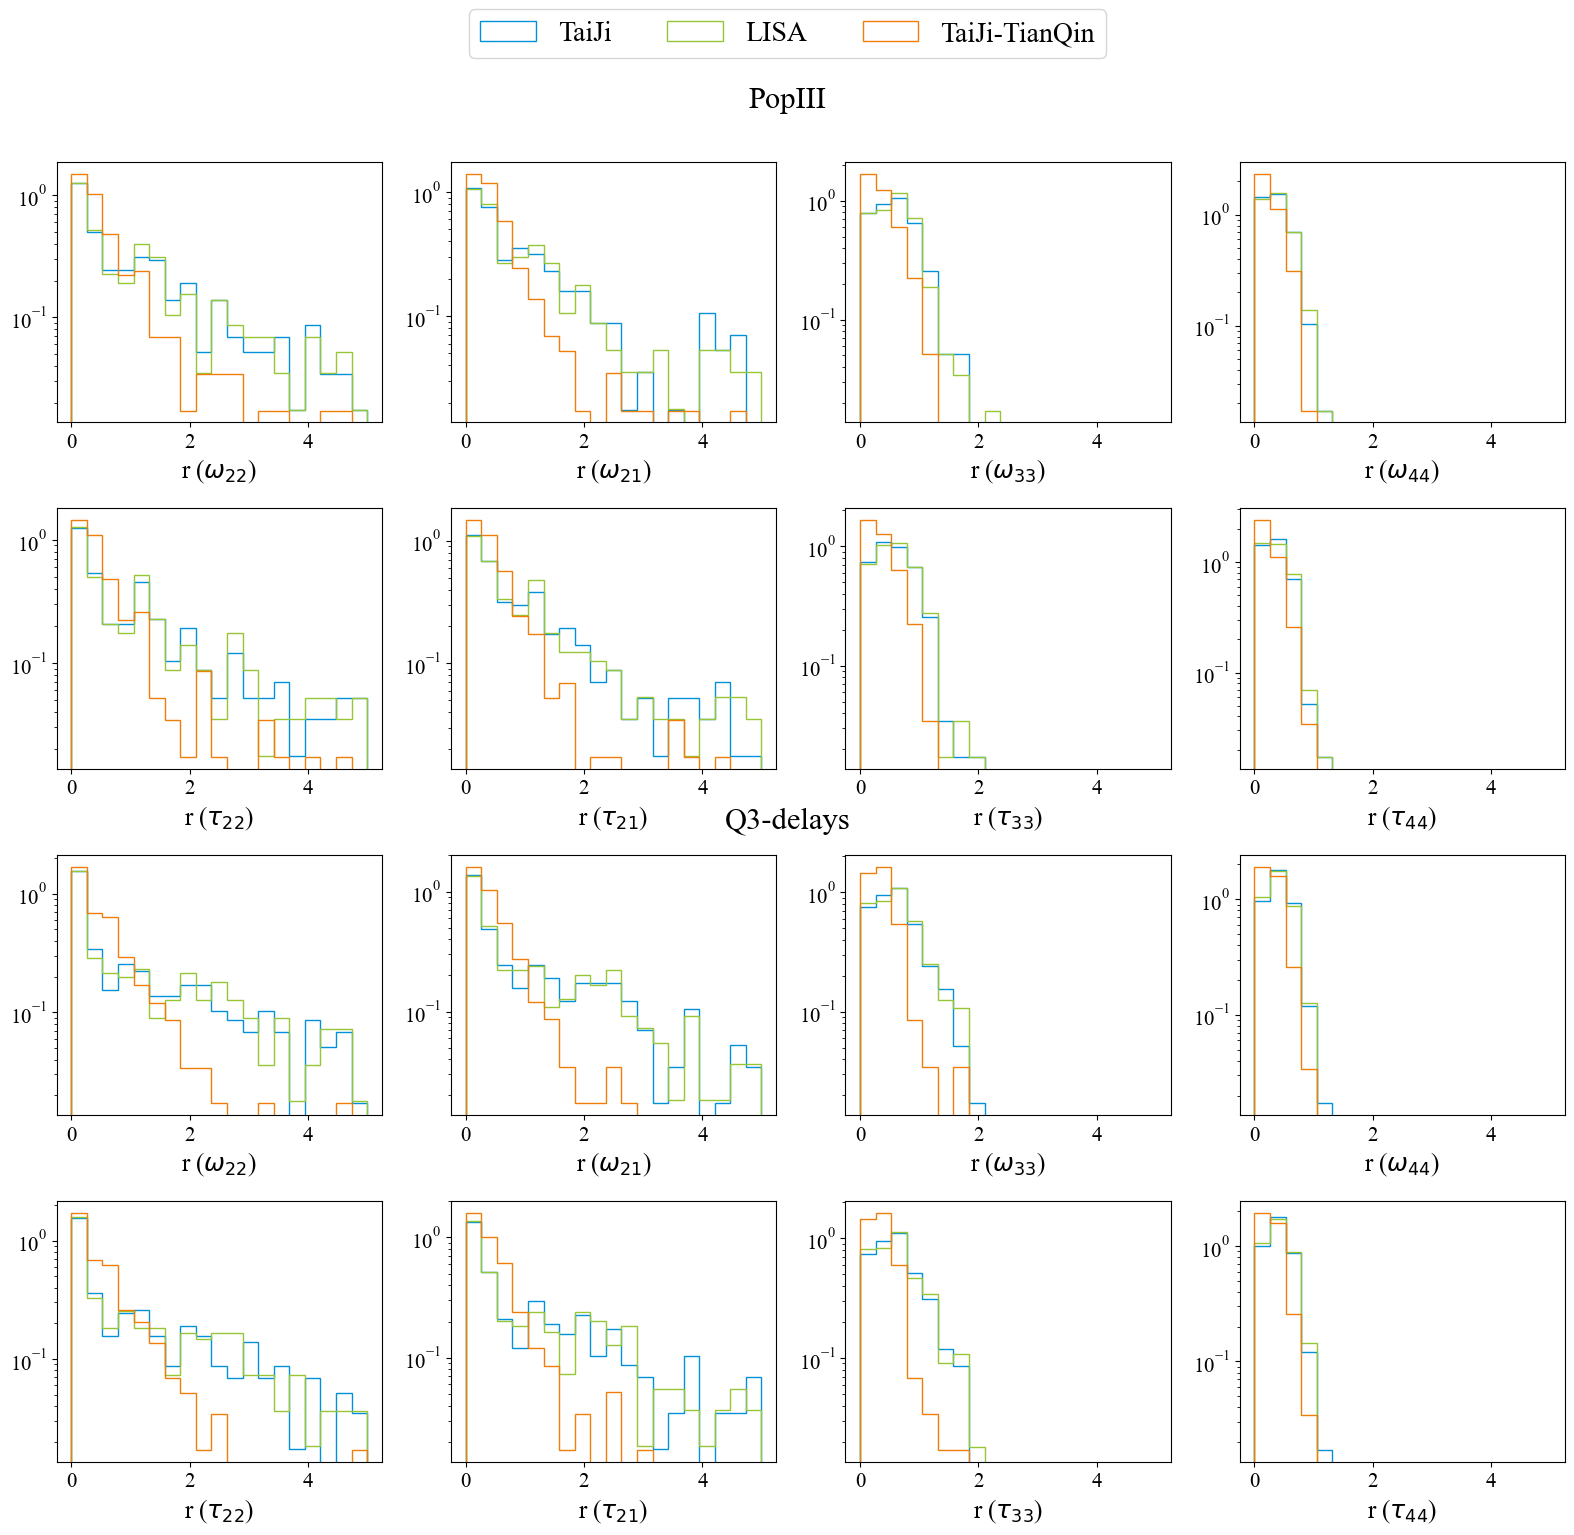

In [292]:
# 设置相同的x轴范围和bins
bins = np.linspace(0, 5, 20)
#xlim = (1, 1000)

# 创建图形和子图
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# 在每个子图上绘制多个直方图
numij = 0
for i in range(2):
    for j in range(4):
        
        axs[i, j].hist(d4[numij], bins=bins, histtype='step', color='#0091D8', density=True)
        axs[i, j].hist(d5[numij], bins=bins, histtype='step', color='#96C535', density=True)
        axs[i, j].hist(d6[numij], bins=bins, histtype='step', color='#EE7D09', density=True)
        
        
        #axs[i, j].hist(data3, bins=bins, histtype='step', color='green', density=True)
        #axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')
        numij +=1
numij = 0

for i in range(2):
    for j in range(4):
        ii = i+2
        axs[ii, j].hist(d1[numij], bins=bins, histtype='step', color='#0091D8', density=True)
        axs[ii, j].hist(d2[numij], bins=bins, histtype='step', color='#96C535', density=True)
        axs[ii, j].hist(d3[numij], bins=bins, histtype='step', color='#EE7D09', density=True)
        
        #axs[i, j].hist(data3, bins=bins, histtype='step', color='green', density=True)
        #axs[i, j].set_xscale('log')
        axs[ii, j].set_yscale('log')
        numij +=1

# 添加各个子图的标签
labels = [r'r ($\omega_{22}$)', r'r ($\omega_{21}$)', r'r ($\omega_{33}$)', r'r ($\omega_{44}$)',  
          r'r ($\tau_{22}$)', r'r ($\tau_{21}$)', r'r ($\tau_{33}$)', r'r ($\tau_{44}$)',
          r'r ($\omega_{22}$)', r'r ($\omega_{21}$)', r'r ($\omega_{33}$)', r'r ($\omega_{44}$)',  
          r'r ($\tau_{22}$)', r'r ($\tau_{21}$)', r'r ($\tau_{33}$)', r'r ($\tau_{44}$)']

for ax, label in zip(axs.flat, labels):
    ax.set_xlabel(label,fontsize=18)
    

# 在第一行子图上方添加标题
fig.text(0.5, 0.9, 'PopIII', ha='center', fontsize=22)  
fig.text(0.5, 0.45, 'Q3-delays', ha='center', fontsize=22)
# 添加图例
fig.legend(['TaiJi', 'LISA','TaiJi-TianQin'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.97), fontsize=20)

# 调整布局
#plt.subplots_adjust(bottom=0.1)  # 调整 top 参数以预留足够空间
plt.tight_layout(rect=[0, 0, 1, 0.88])

# 显示图形
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/PopIII Taiji-Tianqin.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/PopIII Taiji-Tianqin.png")
plt.show()

In [294]:
data3 = pd.read_fwf('population_data/Klein16_Q3nodelays.txt', header=None)

In [304]:
np.random.seed(234)
SNR_threshold = 8     #SNR threshold
event_rate_p3 = 600
Index_p3 = []
len_pop = len(data3.iloc[:,1])-1     #这一行给出popIII模型的catalog长度
error_w1_n = []
error_w2_n = []
error_w3_n = []
error_w4_n = []
error_t1_n = []
error_t2_n = []
error_t3_n = []
error_t4_n = []


#给有gap情况的
error_w1_ngp = []
error_w2_ngp = []
error_w3_ngp = []
error_w4_ngp = []
error_t1_ngp = []
error_t2_ngp = []
error_t3_ngp = []
error_t4_ngp = []

error_w1_n_tjnd = []
error_w2_n_tjnd = []
error_w3_n_tjnd = []
error_w4_n_tjnd = []
error_t1_n_tjnd = []
error_t2_n_tjnd = []
error_t3_n_tjnd = []
error_t4_n_tjnd = []

error_w1_ngp_tjnd = []
error_w2_ngp_tjnd = []
error_w3_ngp_tjnd = []
error_w4_ngp_tjnd = []
error_t1_ngp_tjnd = []
error_t2_ngp_tjnd = []
error_t3_ngp_tjnd = []
error_t4_ngp_tjnd = []

error_w1_n_lsnd = []
error_w2_n_lsnd = []
error_w3_n_lsnd = []
error_w4_n_lsnd = []
error_t1_n_lsnd = []
error_t2_n_lsnd = []
error_t3_n_lsnd = []
error_t4_n_lsnd = []

error_w1_n_gplsnd = []
error_w2_n_gplsnd = []
error_w3_n_gplsnd = []
error_w4_n_gplsnd = []
error_t1_n_gplsnd = []
error_t2_n_gplsnd = []
error_t3_n_gplsnd = []
error_t4_n_gplsnd = []


freq = np.arange(1e-5,1,1e-5)
num = 0

for nn in tqdm(range(event_rate_p3)):

    rand_int = np.random.randint(len_pop)       #这一行生成catalog长度的随机整数
    red1,m11,m12 = data3.iloc[rand_int,0],data3.iloc[rand_int,1],data3.iloc[rand_int,2]        #赋值红移，质量1，质量2，两个主要参数

    Mass1 = (m11+m12)*0.94
    if 1e5  <Mass1<1e8:
        ratio1 = m11/m12
        rd_ang = np.random.uniform(0,pi,3)
        random1,random2 = np.random.uniform(0,1,2)
        
        param1 = [Mass1,ratio1,red1]
        fi = wf.fin(Mass1,ratio1)
        fe = wf.fout(Mass1,ratio1)
        freq_rd = np.arange(fi,fe,1e-5)
        #signal = wf.gap_sfa(freq,param1,rd_ang,random,'tjnd')
        signal1 = wf.sfa(freq_rd,param1,rd_ang,'tj')
        snr_index = dp.SNR(signal1,signal1,wf.PSD_tj(freq_rd),1e-5)
        if snr_index>SNR_threshold:
            num+=1


            #先算联合观测的，第一个是太极天琴联合观测，第二个是有间隙太极天琴联合观测，第三个是单独太极间隙
            result = fm.comb_fm(param1,rd_ang,'tj','tq')
            error_w1_n.append(result[0])
            error_w2_n.append(result[1])
            error_w3_n.append(result[2])
            error_w4_n.append(result[3])
            error_t1_n.append(result[4])
            error_t2_n.append(result[5])
            error_t3_n.append(result[6])
            error_t4_n.append(result[7])

            result2 = fm.gp_comb_fm(freq,param1,rd_ang,random1,random2,'tj','tq')
            error_w1_ngp.append(result2[0])
            error_w2_ngp.append(result2[1])
            error_w3_ngp.append(result2[2])
            error_w4_ngp.append(result2[3])
            error_t1_ngp.append(result2[4])
            error_t2_ngp.append(result2[5])
            error_t3_ngp.append(result2[6])
            error_t4_ngp.append(result2[7])
            
            error_w1_ngp_tjnd.append(result2[8][0])
            error_w2_ngp_tjnd.append(result2[8][1])
            error_w3_ngp_tjnd.append(result2[8][2])
            error_w4_ngp_tjnd.append(result2[8][3])
            error_t1_ngp_tjnd.append(result2[8][4])
            error_t2_ngp_tjnd.append(result2[8][5])
            error_t3_ngp_tjnd.append(result2[8][6])
            error_t4_ngp_tjnd.append(result2[8][7])

            result3 = fm.tj_fm(param1,rd_ang)
            error_w1_n_tjnd.append(result3[0])
            error_w2_n_tjnd.append(result3[1])
            error_w3_n_tjnd.append(result3[2])
            error_w4_n_tjnd.append(result3[3])
            error_t1_n_tjnd.append(result3[4])
            error_t2_n_tjnd.append(result3[5])
            error_t3_n_tjnd.append(result3[6])
            error_t4_n_tjnd.append(result3[7])

            result4 = fm.ls_fm(param1,rd_ang)
            error_w1_n_lsnd.append(result4[0])
            error_w2_n_lsnd.append(result4[1])
            error_w3_n_lsnd.append(result4[2])
            error_w4_n_lsnd.append(result4[3])
            error_t1_n_lsnd.append(result4[4])
            error_t2_n_lsnd.append(result4[5])
            error_t3_n_lsnd.append(result4[6])
            error_t4_n_lsnd.append(result4[7])

            result4 = fm.gp_ls_fm(freq,param1,rd_ang,random1)
            error_w1_n_gplsnd.append(result4[0])
            error_w2_n_gplsnd.append(result4[1])
            error_w3_n_gplsnd.append(result4[2])
            error_w4_n_gplsnd.append(result4[3])
            error_t1_n_gplsnd.append(result4[4])
            error_t2_n_gplsnd.append(result4[5])
            error_t3_n_gplsnd.append(result4[6])
            error_t4_n_gplsnd.append(result4[7])

error_w1_cbnd = np.array(error_w1_n)
error_w2_cbnd = np.array(error_w2_n)
error_w3_cbnd = np.array(error_w3_n)
error_w4_cbnd = np.array(error_w4_n)
error_t1_cbnd = np.array(error_t1_n)
error_t2_cbnd = np.array(error_t2_n)
error_t3_cbnd = np.array(error_t3_n)
error_t4_cbnd = np.array(error_t4_n)

error_w1_gp_cbnd = np.array(error_w1_ngp)
error_w2_gp_cbnd = np.array(error_w2_ngp)
error_w3_gp_cbnd = np.array(error_w3_ngp)
error_w4_gp_cbnd = np.array(error_w4_ngp)
error_t1_gp_cbnd = np.array(error_t1_ngp)
error_t2_gp_cbnd = np.array(error_t2_ngp)
error_t3_gp_cbnd = np.array(error_t3_ngp)
error_t4_gp_cbnd = np.array(error_t4_ngp)

error_w1_gp_tjnd = np.array(error_w1_ngp_tjnd)
error_w2_gp_tjnd = np.array(error_w2_ngp_tjnd)
error_w3_gp_tjnd = np.array(error_w3_ngp_tjnd)
error_w4_gp_tjnd = np.array(error_w4_ngp_tjnd)
error_t1_gp_tjnd = np.array(error_t1_ngp_tjnd)
error_t2_gp_tjnd = np.array(error_t2_ngp_tjnd)
error_t3_gp_tjnd = np.array(error_t3_ngp_tjnd)
error_t4_gp_tjnd = np.array(error_t4_ngp_tjnd)

error_w1_tjnd = np.array(error_w1_n_tjnd)
error_w2_tjnd = np.array(error_w2_n_tjnd)
error_w3_tjnd = np.array(error_w3_n_tjnd)
error_w4_tjnd = np.array(error_w4_n_tjnd)
error_t1_tjnd = np.array(error_t1_n_tjnd)
error_t2_tjnd = np.array(error_t2_n_tjnd)
error_t3_tjnd = np.array(error_t3_n_tjnd)
error_t4_tjnd = np.array(error_t4_n_tjnd)

error_w1_lsnd = np.array(error_w1_n_lsnd)
error_w2_lsnd = np.array(error_w2_n_lsnd)
error_w3_lsnd = np.array(error_w3_n_lsnd)
error_w4_lsnd = np.array(error_w4_n_lsnd)
error_t1_lsnd = np.array(error_t1_n_lsnd)
error_t2_lsnd = np.array(error_t2_n_lsnd)
error_t3_lsnd = np.array(error_t3_n_lsnd)
error_t4_lsnd = np.array(error_t4_n_lsnd)


error_w1_gplsnd = np.array(error_w1_n_gplsnd)
error_w2_gplsnd = np.array(error_w2_n_gplsnd)
error_w3_gplsnd = np.array(error_w3_n_gplsnd)
error_w4_gplsnd = np.array(error_w4_n_gplsnd)
error_t1_gplsnd = np.array(error_t1_n_gplsnd)
error_t2_gplsnd = np.array(error_t2_n_gplsnd)
error_t3_gplsnd = np.array(error_t3_n_gplsnd)
error_t4_gplsnd = np.array(error_t4_n_gplsnd)

100%|██████████| 600/600 [2:09:24<00:00, 12.94s/it]    


In [307]:
nd_tj = np.array([error_w1_tjnd,error_w2_tjnd,error_w3_tjnd,error_w4_tjnd,error_t1_tjnd,error_t2_tjnd,error_t3_tjnd,error_t4_tjnd])
nd_tj_gp = np.array([error_w1_gp_tjnd,error_w2_gp_tjnd,error_w3_gp_tjnd,error_w4_gp_tjnd,error_t1_gp_tjnd,error_t2_gp_tjnd,error_t3_gp_tjnd,error_t4_gp_tjnd])
nd_cb = np.array([error_w1_cbnd,error_w2_cbnd,error_w3_cbnd,error_w4_cbnd,error_t1_cbnd,error_t2_cbnd,error_t3_cbnd,error_t4_cbnd])
nd_cb_gp = np.array([error_w1_gp_cbnd,error_w2_gp_cbnd,error_w3_gp_cbnd,error_w4_gp_cbnd,error_t1_gp_cbnd,error_t2_gp_cbnd,error_t3_gp_cbnd,error_t4_gp_cbnd])
nd_ls = np.array([error_w1_lsnd,error_w2_lsnd,error_w3_lsnd,error_w4_lsnd,error_t1_lsnd,error_t2_lsnd,error_t3_lsnd,error_t4_lsnd])
nd_ls_gp = np.array([error_w1_gplsnd,error_w2_gplsnd,error_w3_gplsnd,error_w4_gplsnd,error_t1_gplsnd,error_t2_gplsnd,error_t3_gplsnd,error_t4_gplsnd])
d7 = np.abs((nd_tj_gp-nd_tj)/nd_tj)
d8 = np.abs((nd_ls_gp-nd_ls)/nd_ls)
d9 = np.abs((nd_cb_gp-nd_cb)/nd_cb)

In [341]:
np.savetxt('delta_population/nd_tj.txt',nd_tj,delimiter=',')
np.savetxt('delta_population/nd_tj_gp.txt',nd_tj_gp,delimiter=',')
np.savetxt('delta_population/nd_cb.txt',nd_cb,delimiter=',')
np.savetxt('delta_population/nd_cb_gp.txt',nd_cb_gp,delimiter=',')
np.savetxt('delta_population/nd_ls.txt',nd_ls,delimiter=',')
np.savetxt('delta_population/nd_ls_gp.txt',nd_ls_gp,delimiter=',')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


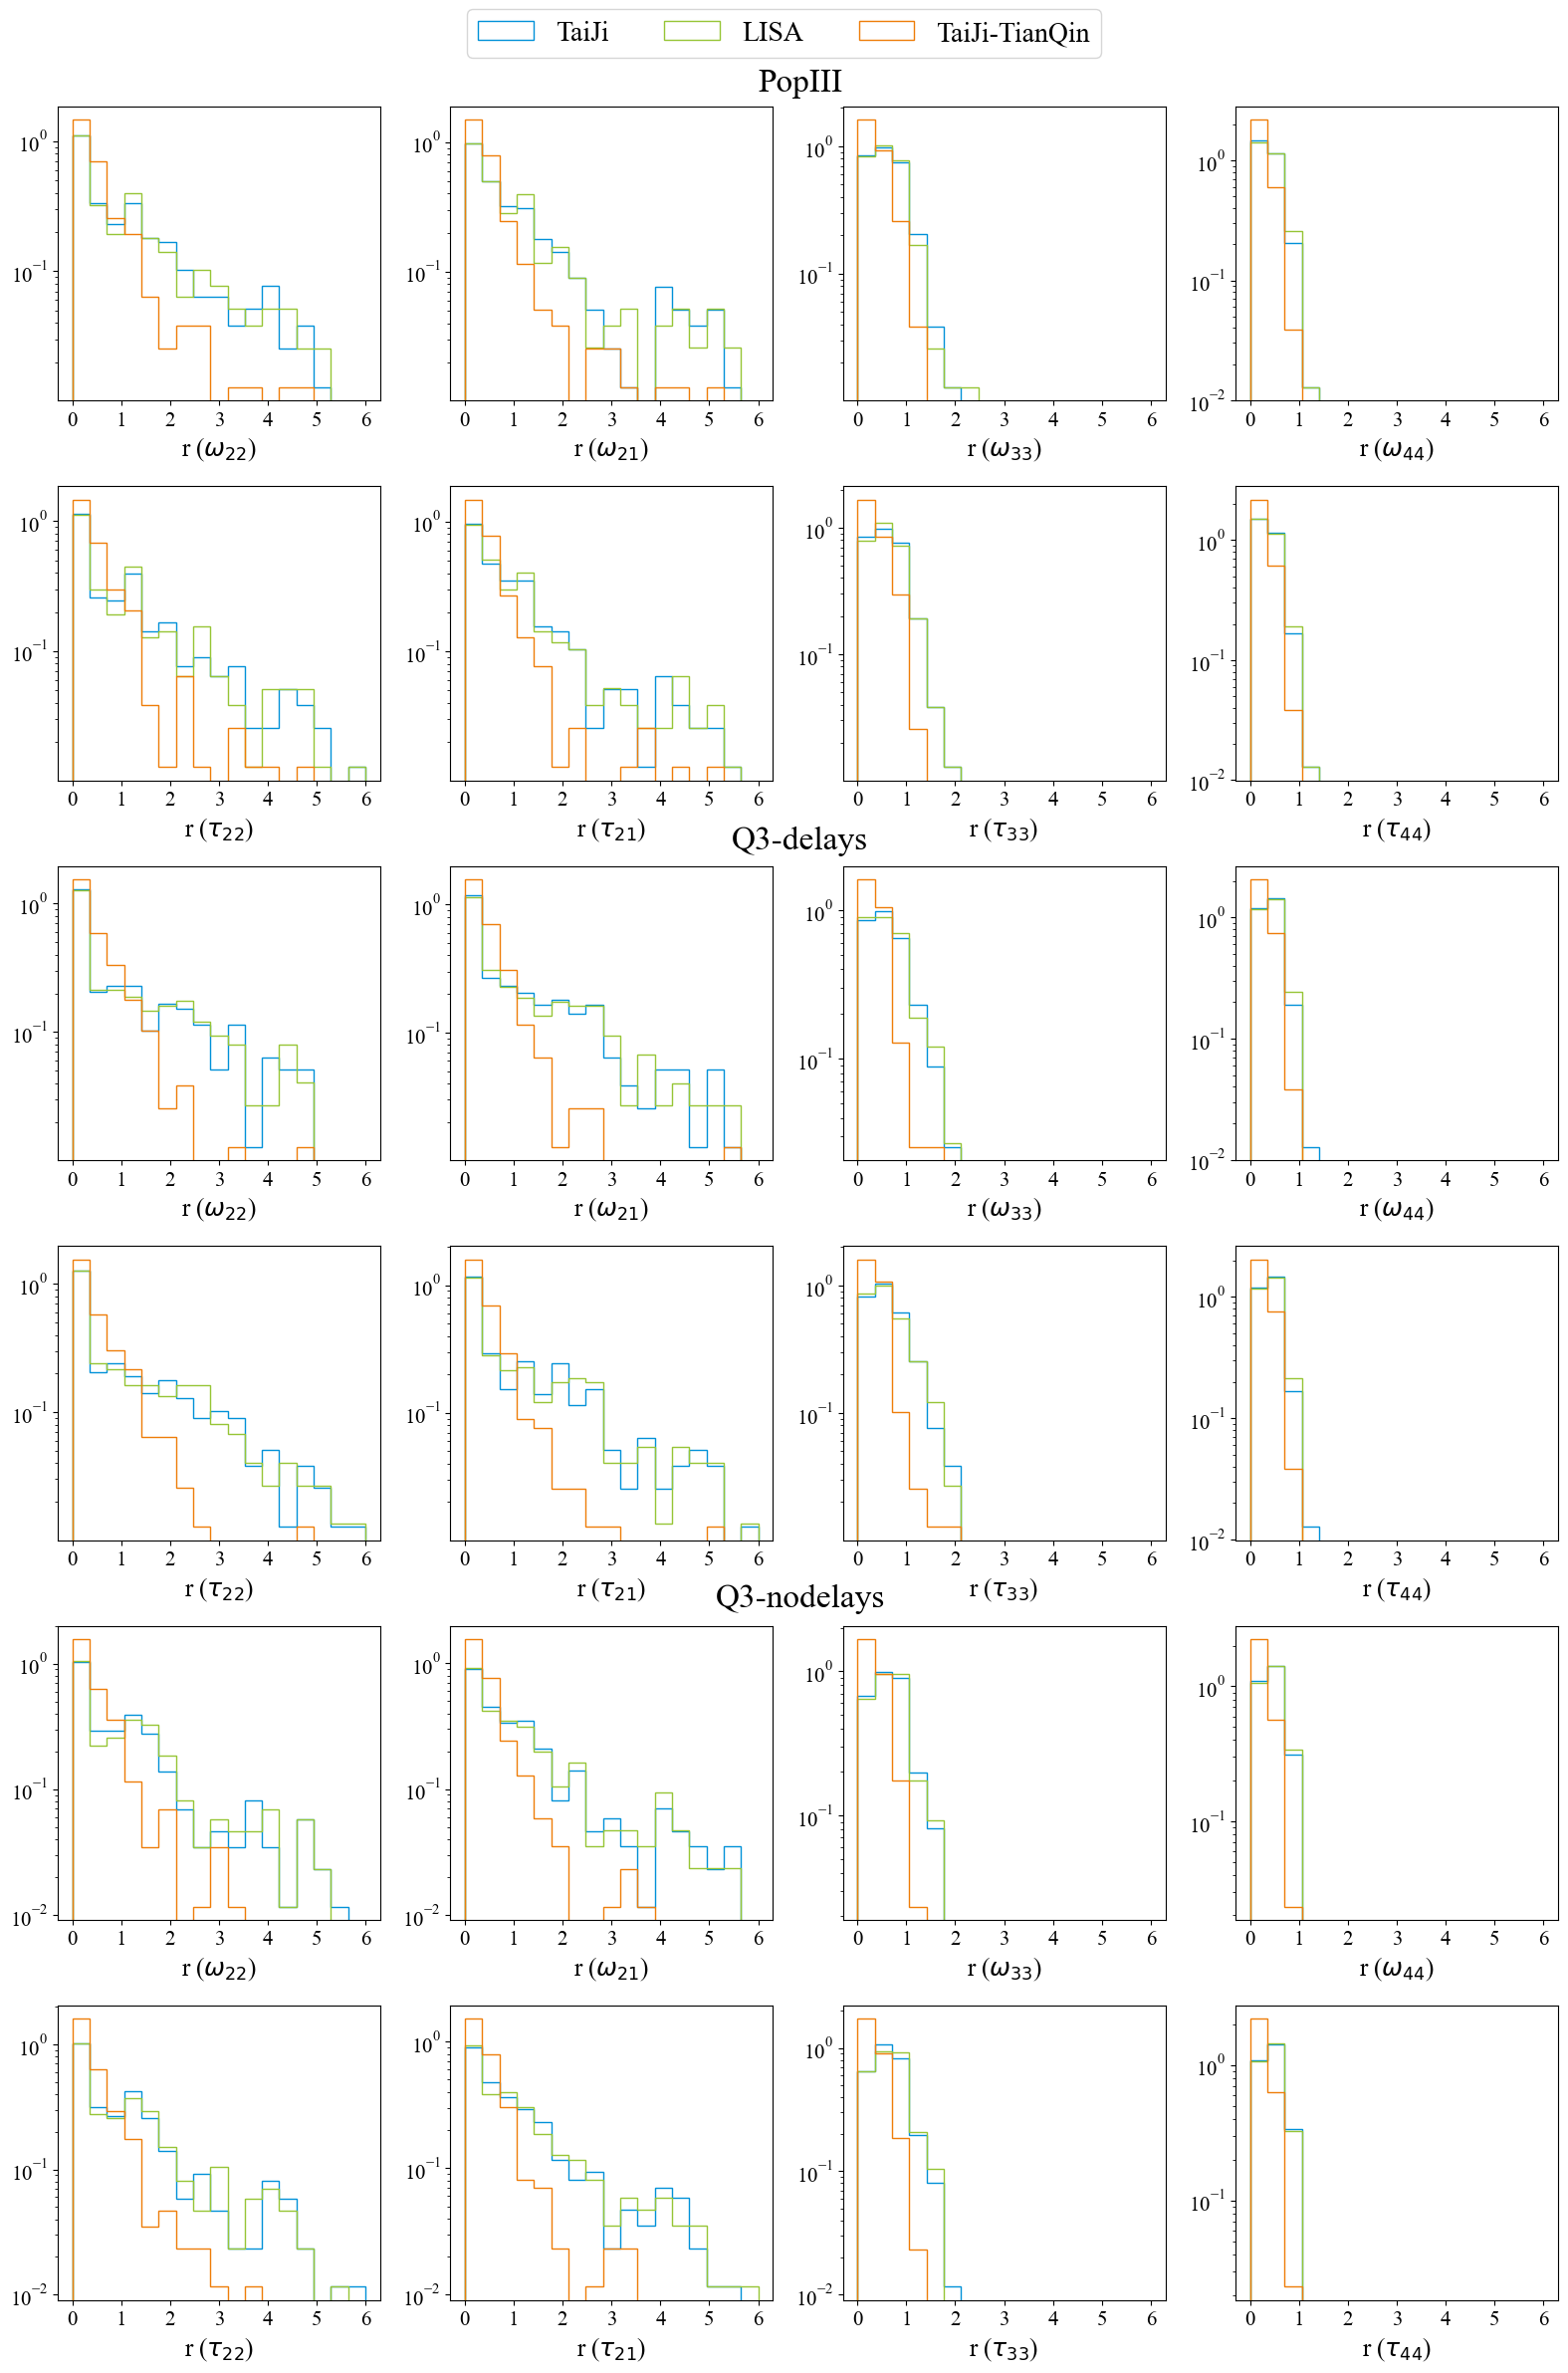

In [349]:
bins = np.linspace(0, 6, 18)
#xlim = (1, 1000)

# 创建图形和子图
fig, axs = plt.subplots(6, 4, figsize=(16, 24))
xticks = [0,1, 2, 3, 4, 5,6]
# 在每个子图上绘制多个直方图
numij = 0
for i in range(2):
    for j in range(4):
        
        axs[i, j].hist(d4[numij], bins=bins, histtype='step', color='#0091D8', density=True)
        axs[i, j].hist(d5[numij], bins=bins, histtype='step', color='#96C535', density=True)
        axs[i, j].hist(d6[numij], bins=bins, histtype='step', color='#EE7D09', density=True)
        
        axs[i, j].set_xticks(xticks)
        #axs[i, j].hist(data3, bins=bins, histtype='step', color='green', density=True)
        #axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')
        numij +=1
numij = 0
for i in range(2):
    for j in range(4):
        ii = i+2
        axs[ii, j].hist(d1[numij], bins=bins, histtype='step', color='#0091D8', density=True)
        axs[ii, j].hist(d2[numij], bins=bins, histtype='step', color='#96C535', density=True)
        axs[ii, j].hist(d3[numij], bins=bins, histtype='step', color='#EE7D09', density=True)
        axs[ii, j].set_xticks(xticks)
        #axs[i, j].hist(data3, bins=bins, histtype='step', color='green', density=True)
        #axs[ii, j].set_xscale('log')
        axs[ii, j].set_yscale('log')
        numij +=1
numij = 0
for i in range(2):
    for j in range(4):
        iii = i+4
        axs[iii, j].hist(d7[numij], bins=bins, histtype='step', color='#0091D8', density=True)
        axs[iii, j].hist(d8[numij], bins=bins, histtype='step', color='#96C535', density=True)
        axs[iii, j].hist(d9[numij], bins=bins, histtype='step', color='#EE7D09', density=True)
        axs[iii, j].set_xticks(xticks)
        #axs[i, j].hist(data3, bins=bins, histtype='step', color='green', density=True)
        #axs[iii, j].set_xscale('log')
        axs[iii, j].set_yscale('log')
        numij +=1

# 添加各个子图的标签
labels = [r'r ($\omega_{22}$)', r'r ($\omega_{21}$)', r'r ($\omega_{33}$)', r'r ($\omega_{44}$)',  
          r'r ($\tau_{22}$)', r'r ($\tau_{21}$)', r'r ($\tau_{33}$)', r'r ($\tau_{44}$)',
          r'r ($\omega_{22}$)', r'r ($\omega_{21}$)', r'r ($\omega_{33}$)', r'r ($\omega_{44}$)',  
          r'r ($\tau_{22}$)', r'r ($\tau_{21}$)', r'r ($\tau_{33}$)', r'r ($\tau_{44}$)',
          r'r ($\omega_{22}$)', r'r ($\omega_{21}$)', r'r ($\omega_{33}$)', r'r ($\omega_{44}$)',  
          r'r ($\tau_{22}$)', r'r ($\tau_{21}$)', r'r ($\tau_{33}$)', r'r ($\tau_{44}$)']

for ax, label in zip(axs.flat, labels):
    ax.set_xlabel(label,fontsize=18)
    

# 在第一行子图上方添加标题
fig.text(0.51, 0.96, 'PopIII', ha='center', fontsize=24)  
fig.text(0.51, 0.643, 'Q3-delays', ha='center', fontsize=24)
fig.text(0.51, 0.326, 'Q3-nodelays', ha='center', fontsize=24)
# 添加图例
fig.legend(['TaiJi', 'LISA','TaiJi-TianQin'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.0), fontsize=20)

# 调整布局
#plt.subplots_adjust(bottom=0.1)  # 调整 top 参数以预留足够空间
plt.tight_layout(rect=[0, 0, 1, 0.963])

# 显示图形
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/catalog Taiji-Tianqin.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/catalog Taiji-Tianqin.png")
plt.show()